### Result # 1

#### SAP TMK UrFU Hackathon 2021
**Team ThinkTank**

**Case # 4. Определение количества труб в пакете**

- Агбозо Эбенезер
- Almadani Abdulkareem
- Власова Наталия 
- Гуськова Дарья Вадимовна
- Итяйкин Дмитрий Анатольевич

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

load the image

create a copy which we will use for counting the pipes

when we are done, we will load the results on the original

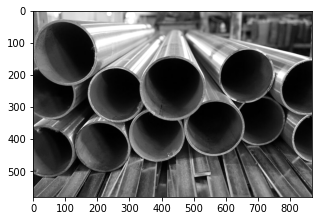

In [2]:
image = 'image/im5.jpg'

img = cv2.imread(image, 1)

img_orig = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.rcParams["figure.figsize"] = (5, 7)
plt.imshow(img, cmap='gray')

blur the image using the **Gaussian Blur**

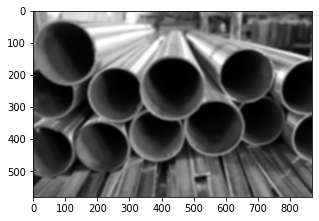

In [3]:
img_gaussian = cv2.GaussianBlur(img, (11,11), cv2.BORDER_DEFAULT)
plt.rcParams["figure.figsize"] = (5, 7)
plt.imshow(img_gaussian, cmap='gray')


Use the **Hough Circles** function from OpenCV to find circles and Lines

The method used is the **HOUGH_GRADIENT**

set the minimum radius and max radius (_depending on the approximate size_)

param1 & param2 for HOUGH_GRADIENT which use _Canny()_ edge detector

these parameters can be fine-tuned and adjusted

In [4]:
#circles = cv2.HoughCircles(img, cv2.cv2.HOUGH_GRADIENT, 1.2, 75)


circles_guassian =  cv2.HoughCircles(img_gaussian, cv2.cv2.HOUGH_GRADIENT, 0.9, 120, param1=0.9, param2=30, minRadius=60, maxRadius=90)
circles_rounded_guassian = np.uint16(np.around(circles_guassian))

In [5]:
#print (circles_rounded_guassian)
#[x,y,r] - xy center cordinates, r - radius

print ("There are " + str(circles_rounded_guassian.shape[1]) + " CIRCLES")

There are 11 CIRCLES


In [6]:
count = 1

for i in circles_rounded_guassian[0,:]:
    cv2.circle(img_orig, (i[0], i[1]), i[2], (50, 200, 200), 5)
    cv2.circle(img_orig,(i[0], i[1]), 2, 3)
    #cv2.putText(img_orig, "Pipe " + str(count), (i[0]-70, i[0]+30), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (255, 0, 0), 2)
    cv2.putText(img_orig, "{}".format(str(count)), (i[0], i[1] - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    count +=1

Gaussian Blur Count


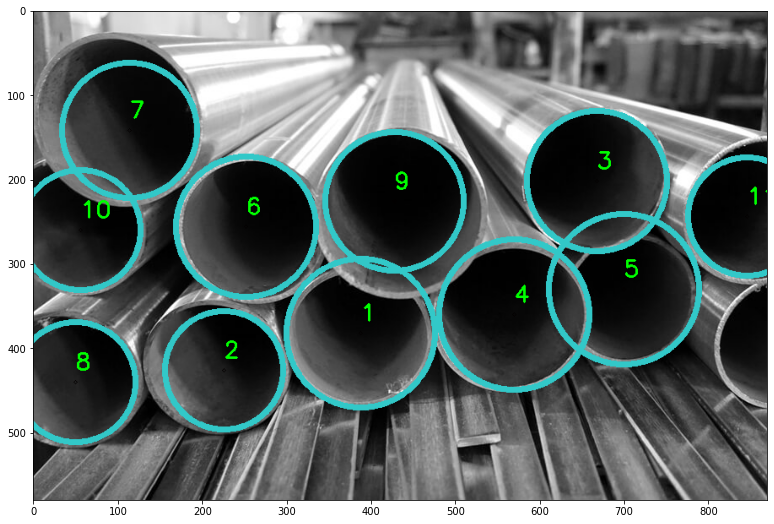

In [7]:
plt.rcParams["figure.figsize"] = (16, 9)
print ("Gaussian Blur Count")
plt.imshow(img_orig)

#### serialize results to JSON

In [8]:
number_of_pipes = circles_rounded_guassian.shape[1]


import json
class Object:
    def toJSON(self):
        return json.dumps(self, default=lambda o: o.__dict__, 
            sort_keys=True, indent=4)
    

from time import gmtime, strftime

me = Object()
me.package = "TMK_1234"
me.time = strftime("%Y-%m-%d %H:%M:%S", gmtime())
me.numberOfPipes = number_of_pipes

print("JSON Data")
print(me.toJSON())

JSON Data
{
    "numberOfPipes": 11,
    "package": "TMK_1234",
    "time": "2021-02-16 23:03:50"
}
